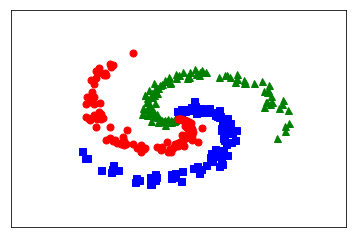

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt
from xlwings import xrange

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in xrange(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()
   

In [5]:

def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# cost or loss function  
def cost(Y, Yhat):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]




In [ ]:
d0=2
d1=h=100
d2=C=3

# khoi tao cac tham so ngau nhien
w1=0.01*np.random.randn(d0,d1)
b1=np.zeros((d1,1))
w2=0.01*np.random.randn(d1,d2)
b2=np.zeros((d2,1))

Y=convert_labels(y,C)
N=X.shape[1]

eta=1
for i in xrange(10000):
    ## feedforward
    Z1=np.dot(w1.T,X)+b1
    A1=np.maximum(Z1,0)
    Z2=np.dot(w2.T,A1)+b2
    yHat=softmax(Z2)
    
    if i%1000==0:
        loss=cost(y,yHat)
        print('loss : ',loss)
        
    ## Backpropagation
    
    E2=(yHat-y)/N
    dw2=np.dot(A1,E2.T)
    db2=np.sum(E2,axis=1,keepdims=True)
    E1=np.dot(w2,E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU 
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update 
    # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
    w1 += -eta*dW1 
    b1 += -eta*db1 
    w2 += -eta*dw2
    b2 += -eta*db2 

Z1 = np.dot(w1.T, X) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(w2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % acc)

# Visualize results 
#Visualize 


xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(w1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(w2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
    
    
        
    
    
    

